In [2]:
import requests
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from math import sqrt 
from collections import Counter
from datetime import date, datetime, timedelta
import time

/Users/nadiaaitmada/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


In [94]:
# Aeronefs
link_aero = '/Users/nadiaaitmada/Desktop/Wild/projet3/aeronefs_2024-06-02.csv'
df_aero = pd.read_csv(link_aero)
df_aero.head()

,ref_aero,type_model,debut_service,last_maint,en_maintenance,end_maint
0,E170_6353,E170,2000-03-17,2024-03-27 00:00:00,False,NaN
1,B767_2803,B767,2020-12-03,2024-06-01 00:00:00,False,NaN
2,CRJ700_6943,CRJ700,2015-01-29,2024-06-02,True,2024-06-03 14:13:00
3,A350_1177,A350,2005-08-07,2024-01-04 00:00:00,False,NaN
4,B777_4029,B777,2009-01-01,2024-06-01 00:00:00,False,NaN


In [95]:
df_aero.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 232 entries, 0 to 231
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   ref_aero        232 non-null    object
 1   type_model      232 non-null    object
 2   debut_service   232 non-null    object
 3   last_maint      232 non-null    object
 4   en_maintenance  232 non-null    bool  
 5   end_maint       15 non-null     object
dtypes: bool(1), object(5)
memory usage: 9.4+ KB


In [ ]:
##### JE N'AI PAS REUSSI A RETIRER LES HEURES DANS end_maintenance#########

In [96]:
# dataset aeronefs :
## contient 232 lignes et 6 colonnes => print(df_aero.shape)
## 1 avion dupliqué => df_aero.duplicated(subset ="ref_aero") => ref avion : E170_5551	
## Vérifier la présence de valeur null  => df_aero.isna().sum(): 217 end_maint  
## Avion en maintenance au moemnt de l'accès au fichier : 15 

# I. Transformation du jeu de données
## 1. Format colonne de date 
# Convertis plusieurs colonnes en datetime
df_aero[['debut_service','last_maint','end_maint']] = df_aero[['debut_service','last_maint','end_maint']].apply(pd.to_datetime,format='mixed')

## 2. Gestion des doublons
### a. Déterminer quel avion est en doublon E170_5551
df_aero.loc[df_aero.duplicated(subset="ref_aero") == True] 
df_aero.drop_duplicates(subset=["ref_aero"],keep="first", ignore_index=True,inplace=True)

## 3. Déterminer le nombre d'avion en maintenance 
df_aero.loc[df_aero['en_maintenance']==True]

## 4. Vérifier la cohérences des dates de maintenance 
### a. Last maintenance toujours supérieure à 2 juin 2024

dispo_fichier = datetime.strptime('2024-06-02','%Y-%m-%d')
df_aero[df_aero['last_maint'] > dispo_fichier]

### b. end maintenance > last maintenance : On retrouve bien les 15
df_aero[(df_aero['last_maint'] < df_aero['end_maint']) == True].count()

### c. Vérifier que si en maintenance == True alors date début maintenance et fin maintenance 

### d. Avion qui serait en maintenance et qui aurait une date de fin de maintenance vide ou date de maintenance sup à date d'entrée en maintenance
df_aero[(((df_aero['last_maint'] < df_aero['end_maint']) == False)|(df_aero['end_maint'].isna()))&(df_aero['en_maintenance']==True)] 

### e. Avion qui serait en maintenance et qui aurait une date de fin maintenance vide ou date de maintenance sup à date d'entrée en maintenance
df_aero[((df_aero['last_maint'] < df_aero['end_maint']) == False)&(df_aero['en_maintenance']==True)] 

# 5.Vérifications des valeurs nulles
df_aero.isna().sum()
        
# df_aero.shape  

ref_aero            0
type_model          0
debut_service       0
last_maint          0
en_maintenance      0
end_maint         216
dtype: int64

In [ ]:
# Export du fichier 
df_aero.to_csv('C:/Users/naitm/OneDrive/Bureau/Wild/Projet3/aeronef_propre.csv', index=True)


In [ ]:
#### Quelques visualisations en attendant 16h...

Text(0, 0.5, 'Nombre ')

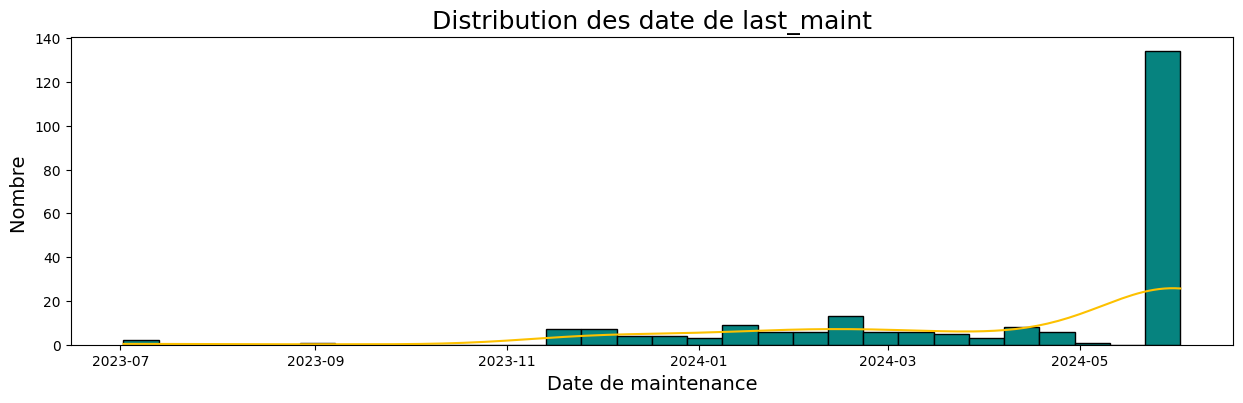

In [98]:
# 1. Tracer l'histogramme des last_maint 
plt.subplots(figsize=(15, 4))
sns.histplot(data=df_aero, x= 'last_maint' , bins= 30 , color= '#fdc100' , facecolor= '#06837f' , kde= True ) 
plt.title( 'Distribution des date de last_maint' , fontsize= 18 )   # Augmenter la taille de la police du titre
plt.xlabel( 'Date de maintenance' , fontsize= 14 )   # Augmenter la taille de la police xlabel
plt.ylabel( "Nombre " , fontsize= 14 )   # Augmenter la taille de la police ylabel
# plt.show()

/var/folders/bb/v9xjw2gj1kz3w53pyhv61yk40000gn/T/ipykernel_66411/870199638.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_top3, x='model', y='total', ax=axes[0], palette=['#06837f', '#02cecb', '#b4ffff'])


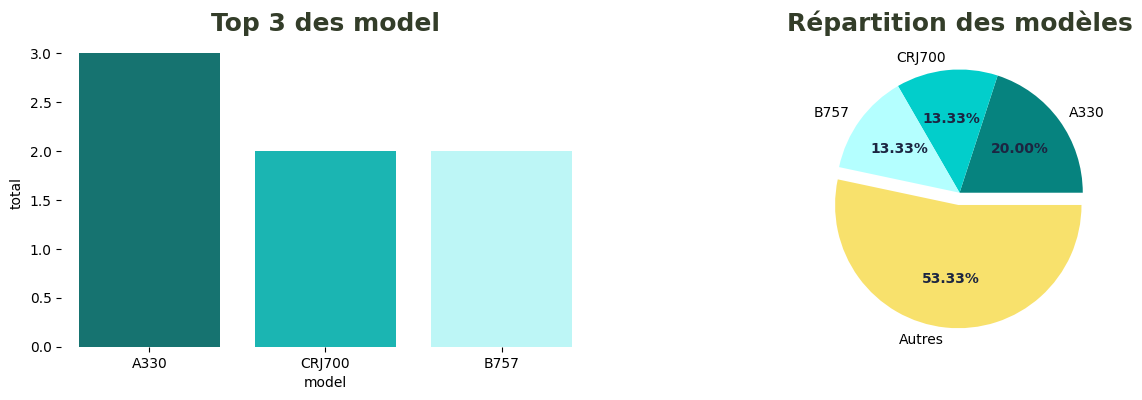

In [121]:
# 3.Top 3 des types d'avion en maintenance
df_maint = df_aero.loc[df_aero['en_maintenance']==True]

# compter occurrences
type_count = Counter(df_maint['type_model'])
df_top3 = pd.DataFrame(type_count.most_common(3), columns=['model', 'total'])

# bar plot
fig, axes = plt.subplots(1, 2, figsize=(15, 4))

sns.barplot(data=df_top3, x='model', y='total', ax=axes[0], palette=['#06837f', '#02cecb', '#b4ffff'])
axes[0].set_title('Top 3 des model', fontsize=18, weight=600, color='#333d29')

# Creation  DataFrame pour tous les modèles
df_all = pd.DataFrame(type_count.items(), columns=['model', 'total']).sort_values('total', ascending=False)

# ajouter 'Autres' au DataFrame des top 3 
df_top3.loc[len(df_top3)] = {'model': 'Autres', 'total': df_all[3:].total.sum()}

# pie chart
wedges, texts, autotexts = axes[1].pie(df_top3['total'], labels=df_top3['model'], autopct='%.2f%%',
                                       textprops={'fontsize': 10}, explode=[0, 0, 0, 0.1],
                                       colors=['#06837f', '#02cecb', '#b4ffff', '#f8e16c'])

# Titres
axes[1].set_title('Répartition des modèles', fontsize=18, weight=600, color='#333d29')

axes[1].set_title('Répartition des modèles', fontsize=18, weight=600, color='#333d29')

# Formatage des labels du pie chart 
for autotext in autotexts:
    autotext.set_color('#1c2541')
    autotext.set_weight('bold')

sns.despine(left=True, bottom=True)
axes[1].axis('off')

plt.show()